In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [385]:
#bring in mushroom data
df_m = pd.read_csv('../data/mushquery.csv')
#df.info()
df_m.head()

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long
0,488305,63622,1990-03-10,1436,999.0,999.0,63622,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Galeropsidaceae,OR,WEST,44.56300,-123.28350
1,518156,3683,1990-06-21,24157,999.0,999.0,3683,Eukarya,Fungi,Ascomycota,Leotiomycetes,Pezizales,Sarcoscyphaceae,MN,MIDWEST,45.02525,-93.61570
2,518163,3599,1990-06-28,24157,999.0,999.0,3599,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Physalacriaceae,MN,MIDWEST,45.02525,-93.61570
3,448480,281,1990-07-04,24157,999.0,999.0,281,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Crepidotaceae,MN,MIDWEST,45.02525,-93.61570
4,31341,43745,1990-07-15,789,999.0,999.0,43745,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Amanitaceae,OH,MIDWEST,40.64390,-80.56065


In [387]:
#fix date, from obj to date
df_m['date']=pd.to_datetime(df_m['date'])
#Separate out into decades
df_2010s = df_m[df_m['date'].between('2010-01-01', '2019-12-31')]
#df_2010s
#create year column on the end
df_2010s['year']= df_2010s['date'].dt.year
#create month column on the end
df_2010s['month']= df_2010s['date'].dt.month
df_2010s

C:\Users\cjami\AppData\Local\Temp\ipykernel_53444\2367106388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010s['year']= df_2010s['date'].dt.year
C:\Users\cjami\AppData\Local\Temp\ipykernel_53444\2367106388.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010s['month']= df_2010s['date'].dt.month


,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
22128,31409,30271,2010-01-01,768,999.0000,999.0000,30271,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,CA,WEST,34.10160,-118.35000,2010,1
22129,62402,22603,2010-01-01,539,999.0000,999.0000,22603,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Russulales,Russulaceae,CA,WEST,38.01575,-122.66250,2010,1
22130,34680,43604,2010-01-01,2243,999.0000,999.0000,43604,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Boletales,Boletaceae,CA,WEST,37.59900,-122.01850,2010,1
22131,31239,150,2010-01-01,1033,999.0000,999.0000,150,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,CA,WEST,37.92265,-122.18150,2010,1
22132,31269,47544,2010-01-01,2299,999.0000,999.0000,47544,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,CA,WEST,38.44160,-122.50800,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218116,398947,3420,2019-12-31,11485,999.0000,999.0000,3420,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Polyporaceae,TX,SOUTH,30.56305,-96.21770,2019,12
218117,398950,3420,2019-12-31,11485,999.0000,999.0000,3420,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Polyporaceae,TX,SOUTH,30.56305,-96.21770,2019,12
218118,414130,15162,2019-12-31,5,999.0000,999.0000,15162,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Bolbitiaceae,CA,WEST,38.77325,-123.53800,2019,12
218119,414056,306,2019-12-31,5,999.0000,999.0000,306,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Clitocybaceae,CA,WEST,38.77325,-123.53800,2019,12


In [130]:
#get overall counts per year

overall_count = df_2010s.groupby('year')['id'].count()
#type(overall_count)
#reset index to put it back as dataframe with label
m_counts = overall_count.reset_index()
m_counts

,year,id
0,2010,10756
1,2011,14228
2,2012,17057
3,2013,17416
4,2014,20127
5,2015,17097
6,2016,20373
7,2017,22598
8,2018,31350
9,2019,24991


In [58]:
#pull out GA
explore_georgia = df_2010s[df_2010s['state']=='GA']
#explore_georgia
#find count per year
ga_obs_peryr = explore_georgia.groupby('year')['id'].count()
ga_obs_peryr
#keep it as a dataframe
ga_obs_peryr_df = pd.DataFrame({'Observations':ga_obs_peryr})
#needs an index to line up with the avg/precip dataframes
ga_obs_peryr_df.reset_index(inplace=True)
ga_obs_peryr_df


,year,Observations
0,2010,147
1,2011,234
2,2012,641
3,2013,381
4,2014,217
5,2015,561
6,2016,249
7,2017,935
8,2018,4011
9,2019,1173


In [382]:
#pull out CA
explore_california = df_2010s[df_2010s['state']=='CA']
#explore_california
#find count per year
ca_obs_peryr = explore_california.groupby('year')['id'].count()
ca_obs_peryr 
#keep it as a dataframe
ca_obs_peryr_df = pd.DataFrame({'Observations':ca_obs_peryr})
#needs an index to line up with the avg/precip dataframes
ca_obs_peryr_df.reset_index(inplace=True)
ca_obs_peryr_df


,year,Observations
0,2010,4543
1,2011,3969
2,2012,4271
3,2013,3845
4,2014,6028
5,2015,3575
6,2016,4105
7,2017,4556
8,2018,3659
9,2019,3769


In [114]:
#pull out PA
explore_penn = df_2010s[df_2010s['state']=='PA']
explore_penn
#find count per year
pa_obs_peryr = explore_penn.groupby('year')['id'].count()
pa_obs_peryr
#keep it as a dataframe
pa_obs_peryr_df = pd.DataFrame({'Observations':pa_obs_peryr})
#needs an index to line up with the avg/precip dataframes
pa_obs_peryr_df.reset_index(inplace=True)
pa_obs_peryr_df

,year,Observations
0,2010,636
1,2011,1770
2,2012,1930
3,2013,2009
4,2014,1834
5,2015,2055
6,2016,2320
7,2017,2109
8,2018,2017
9,2019,1556


In [438]:
#pull in TEMPERATURE data
df_tavg_dict = pd.read_excel('../data/tavg.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_tavg = pd.concat(df_tavg_dict.values(),ignore_index=True)
df_tavg

,year,state,temp,region
0,2010,AL,62.7,SOUTH
1,2010,AZ,60.4,WEST
2,2010,AR,61.2,SOUTH
3,2010,CA,57.7,WEST
4,2010,CO,46.2,WEST
...,...,...,...,...
523,2020,VA,57.4,SOUTH
524,2020,WA,48.1,WEST
525,2020,WV,54.0,SOUTH
526,2020,WI,44.8,MIDWEST


In [439]:
#Pull in PRECIPITATION DATA
df_precip_dict = pd.read_excel('../data/precip.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_precip = pd.concat(df_precip_dict.values(),ignore_index=True)
df_precip

,year,state,precip,region
0,2010,AL,47.19,SOUTH
1,2010,AZ,13.91,WEST
2,2010,AR,38.79,SOUTH
3,2010,CA,31.18,WEST
4,2010,CO,18.19,WEST
...,...,...,...,...
523,2020,VA,61.40,SOUTH
524,2020,WA,45.25,WEST
525,2020,WV,53.77,SOUTH
526,2020,WI,34.19,MIDWEST


In [440]:
#Isolate Georgia Average Temps
ga_temp = df_tavg[df_tavg['state']=='GA']
ga_temp

,year,state,temp,region
8,2010,GA,63.0000,SOUTH
56,2011,GA,64.6000,SOUTH
104,2012,GA,65.5000,SOUTH
152,2013,GA,63.4000,SOUTH
200,2014,GA,62.9667,SOUTH
248,2015,GA,65.3083,SOUTH
296,2016,GA,65.7917,SOUTH
344,2017,GA,65.8250,SOUTH
392,2018,GA,65.0833,SOUTH
440,2019,GA,66.2000,SOUTH


In [441]:
#Isolate GA Precipitation
ga_precip = df_precip[df_precip['state']=='GA']
ga_precip

,year,state,precip,region
8,2010,GA,43.04,SOUTH
56,2011,GA,40.11,SOUTH
104,2012,GA,42.02,SOUTH
152,2013,GA,63.49,SOUTH
200,2014,GA,51.41,SOUTH
248,2015,GA,55.74,SOUTH
296,2016,GA,40.90,SOUTH
344,2017,GA,49.80,SOUTH
392,2018,GA,60.80,SOUTH
440,2019,GA,47.89,SOUTH


In [442]:
#Isolate CA Average Temps
ca_temp = df_tavg[df_tavg['state']=='CA']
ca_temp

,year,state,temp,region
3,2010,CA,57.7000,WEST
51,2011,CA,57.4000,WEST
99,2012,CA,59.5000,WEST
147,2013,CA,59.3000,WEST
195,2014,CA,61.4500,WEST
243,2015,CA,60.7583,WEST
291,2016,CA,60.1333,WEST
339,2017,CA,60.3417,WEST
387,2018,CA,60.1250,WEST
435,2019,CA,58.4000,WEST


In [443]:
#Isolate CA Precipitation
ca_precip = df_precip[df_precip['state']=='CA']
ca_precip

,year,state,precip,region
3,2010,CA,31.18,WEST
51,2011,CA,18.79,WEST
99,2012,CA,23.45,WEST
147,2013,CA,7.93,WEST
195,2014,CA,19.90,WEST
243,2015,CA,15.04,WEST
291,2016,CA,25.73,WEST
339,2017,CA,28.17,WEST
387,2018,CA,18.09,WEST
435,2019,CA,29.12,WEST


In [444]:
#Isolate PA Average Temps
pa_temp = df_tavg[df_tavg['state']=='PA']
pa_temp

,year,state,temp,region
35,2010,PA,50.1000,NORTHEAST
83,2011,PA,50.4000,NORTHEAST
131,2012,PA,51.8000,NORTHEAST
179,2013,PA,49.0000,NORTHEAST
227,2014,PA,47.4333,NORTHEAST
275,2015,PA,49.4583,NORTHEAST
323,2016,PA,50.9333,NORTHEAST
371,2017,PA,50.6083,NORTHEAST
419,2018,PA,49.7583,NORTHEAST
467,2019,PA,49.9000,NORTHEAST


In [445]:
#Isolate PA Precipitation
pa_precip = df_precip[df_precip['state']=='PA']
pa_precip

,year,state,precip,region
35,2010,PA,42.31,NORTHEAST
83,2011,PA,61.00,NORTHEAST
131,2012,PA,43.49,NORTHEAST
179,2013,PA,41.82,NORTHEAST
227,2014,PA,42.43,NORTHEAST
275,2015,PA,43.10,NORTHEAST
323,2016,PA,39.00,NORTHEAST
371,2017,PA,46.61,NORTHEAST
419,2018,PA,64.04,NORTHEAST
467,2019,PA,50.78,NORTHEAST


In [85]:
#NOT USED 
#Combine temps and precip for GA  - axis=1 concatenates horizontally instead of vertically
#since the year, state and region are the same, i only want to pick up the precipitation column
ga_precip_col = ga_precip['precip']
ga_combined = pd.concat([ga_temp,ga_precip_col],axis=1)
ga_combined

,year,state,temp,region,precip
8,2010,GA,63.0000,SOUTH,43.04
56,2011,GA,64.6000,SOUTH,40.11
104,2012,GA,65.5000,SOUTH,42.02
152,2013,GA,63.4000,SOUTH,63.49
200,2014,GA,62.9667,SOUTH,51.41
248,2015,GA,65.3083,SOUTH,55.74
296,2016,GA,65.7917,SOUTH,40.90
344,2017,GA,65.8250,SOUTH,49.80
392,2018,GA,65.0833,SOUTH,60.80
440,2019,GA,66.2000,SOUTH,47.89


In [446]:
#Overall Temp Average - need the same # of columns to make scatter work
overall_tavg = df_tavg.groupby('year')['temp'].mean()
#type(overall_tavg)
#reset index to put it back as dataframe with label
all_temps = overall_tavg.reset_index()
all_temps

,year,temp
0,2010,52.783333
1,2011,52.914583
2,2012,54.839583
3,2013,51.891667
4,2014,51.528994
5,2015,53.534204
6,2016,54.366325
7,2017,53.937850
8,2018,53.011285
9,2019,52.437500


In [447]:
#Overall Precip - need the same # of columns to make scatter work
overall_precip = df_precip.groupby('year')['precip'].mean()
#type(overall_tavg)
#reset index to put it back as dataframe with label
all_precip = overall_precip.reset_index()
all_precip

,year,precip
0,2010,36.853542
1,2011,39.774792
2,2012,33.649167
3,2013,38.678958
4,2014,37.666667
5,2015,40.149792
6,2016,36.277500
7,2017,38.497708
8,2018,44.223958
9,2019,41.938958


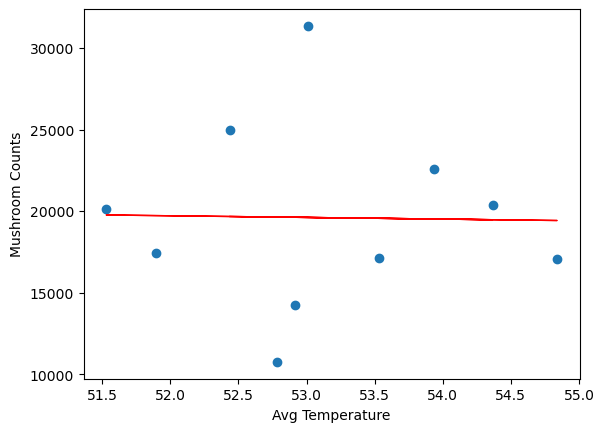

In [370]:
#OVERALL Counts and Temps -  scatter plot - 
#total counts per year
#Average Precipitation, per year
combine_overall = pd.merge(m_counts,all_temps,on='year')

x=combine_overall['temp']
y=combine_overall['id']

coefficients = np.polyfit(x,y,1)
line=np.poly1d(coefficients)
plt.scatter(x,y)

plt.plot(x,line(x),color='red',linewidth=1)
plt.xlabel('Avg Temperature')
plt.ylabel('Mushroom Counts')
plt.show()

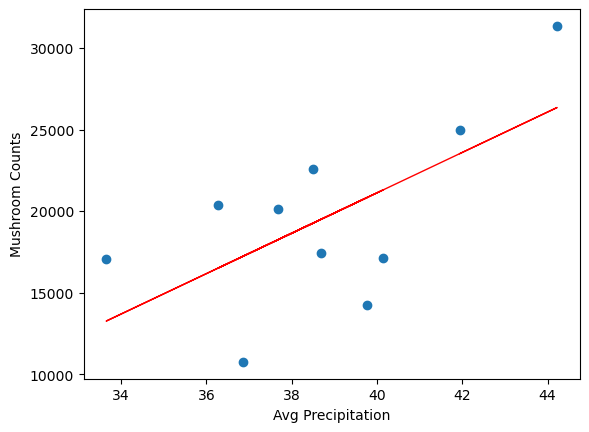

In [368]:
#OVERALL Counts and PRECIP - scatter plot 
#total counts per year
#Average Precip, per year
combine_overallp = pd.merge(m_counts,all_precip,on='year')
x=combine_overall['precip']
y=combine_overall['id']

coefficients = np.polyfit(x,y,1)
line=np.poly1d(coefficients)
plt.scatter(x,y)

plt.plot(x,line(x),color='red',linewidth=1)

plt.xlabel('Avg Precipitation')
plt.ylabel('Mushroom Counts')
plt.show()

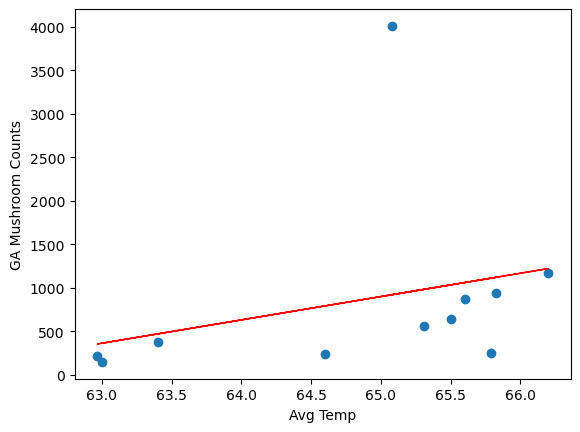

In [372]:
#GEORGIA SCATTERPLOT - TEMPS
#ga_obs_peryr are the mushroom counts for only georgia, per year
#ga_temp contains the average temp for only georgia, per year
combine_georgia = pd.merge(ga_obs_peryr_df,ga_temp,on='year')
x=combine_georgia['temp']
y=combine_georgia['Observations']
coefficients=np.polyfit(x,y,1)
line=np.poly1d(coefficients)
plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)

plt.xlabel('Avg Temp')
plt.ylabel('GA Mushroom Counts')
plt.show()

In [425]:
#Repeat for GA - PRECIPITATION
#ga_obs_peryr are the mushroom counts for only georgia, per year
#ga_precip contains the average temp for only georgia, per year
combine_georgia_p = pd.merge(ga_obs_peryr_df,ga_precip,on='year')
#combine_georgia_p
x=combine_georgia_p['precip']
y=combine_georgia_p['Observations']
coefficients=np.polyfit(x,y,1)
line=np.poly1d(coefficients)
plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)

plt.xlabel('Avg Precipitation')
plt.ylabel('GA Mushroom Counts')
plt.show()

,year,Observations,state,precip,region
0,2010,147,GA,43.04,SOUTH
1,2011,234,GA,40.11,SOUTH
2,2012,641,GA,42.02,SOUTH
3,2013,381,GA,63.49,SOUTH
4,2014,217,GA,51.41,SOUTH
5,2015,561,GA,55.74,SOUTH
6,2016,249,GA,40.90,SOUTH
7,2017,935,GA,49.80,SOUTH
8,2018,4011,GA,60.80,SOUTH
9,2019,1173,GA,47.89,SOUTH


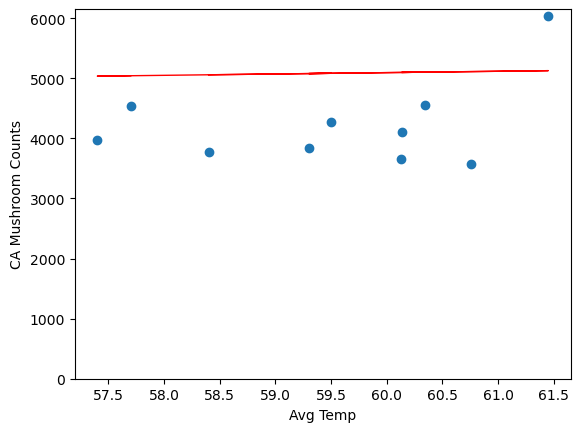

In [423]:
#CALIFORNIA SCATTERPLOT - TEMP
#ca_obs_peryr are the mushroom counts for only cali, per year
#ca_temp contains the average temp for only cali, per year
#way more mushrooms in CA so I needed to normalize the yaxis so the trend line makes sense
combine_california = pd.merge(ca_obs_peryr_df,ca_temp,on='year')
x=combine_california['temp']
y=combine_california['Observations']

coeffcients = np.polyfit(x,y,1)
line=np.poly1d(coefficients)

plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)
#set yaxis to 0
plt.ylim(0)
plt.xlabel('Avg Temp')
plt.ylabel('CA Mushroom Counts')
plt.show()

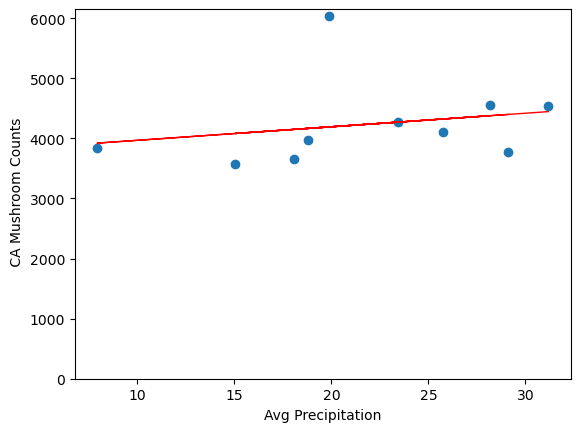

In [422]:
#CALIFORNIA SCATTERPLOT - PRECIP
#ca_obs_peryr are the mushroom counts for only cali, per year
#ca_precip contains the average temp for only cali, per year
combine_california_p = pd.merge(ca_obs_peryr_df,ca_precip,on='year')
#combine_california_p
x=combine_california_p['precip']
y=combine_california_p['Observations']

coefficients=np.polyfit(x,y,1)
line = np.poly1d(coefficients)
plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)

#plt.scatter(combine_california_p['precip'],combine_california_p['Observations'])
plt.ylim(0)
plt.xlabel('Avg Precipitation')
plt.ylabel(' CA Mushroom Counts')
plt.show()

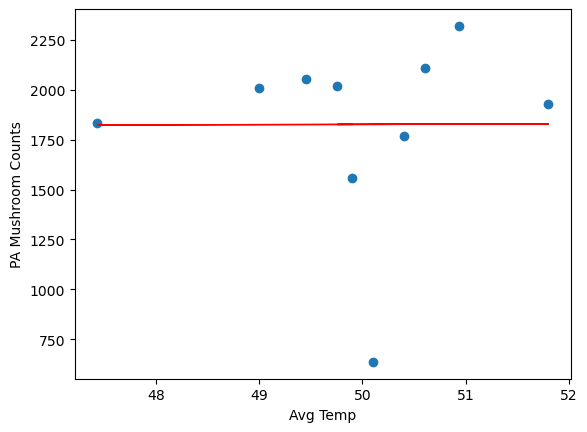

In [448]:
#Repeat for PA - Counts and Temps as scatterplot
#pa_obs_peryr are the mushroom counts for only penn, per year
#pa_temp contains the average temp for only penn, per year
combine_penn = pd.merge(pa_obs_peryr_df,pa_temp,on='year')
x= combine_penn['temp']
y= combine_penn['Observations']
coeffcients = np.polyfit(x,y,1)
line = np.poly1d(coefficients)
plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)

#plt.scatter(combine_penn['temp'],combine_penn['Observations'])

plt.xlabel('Avg Temp')
plt.ylabel('PA Mushroom Counts')
plt.show()

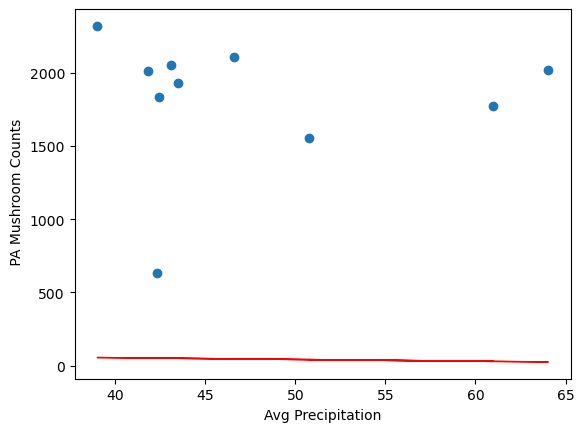

In [530]:
#Repeat for PA - Counts and PRECIP as scatterplot
#pa_obs_peryr are the mushroom counts for only cali, per year
#pa_precip contains the average temp for only cali, per year
combine_penn_p = pd.merge(pa_obs_peryr_df,pa_precip,on='year')

x=combine_penn_p['precip']
y=combine_penn_p['Observations']
coefficients=np.polyfit(x,y,1)
line=np.poly1d(coeffcients)
plt.scatter(x,y)
plt.plot(x,line(x),color='red',linewidth=1)

#plt.scatter(combine_penn_p['precip'],combine_penn_p['Observations'])

plt.xlabel('Avg Precipitation')
plt.ylabel(' PA Mushroom Counts')
plt.show()

In [298]:
#2010 coldest states
#group by year, then sort to see lowest temps

check_2010 = df_tavg[df_tavg['year']==2010]
check_2010
coldest_2010 = check_2010.sort_values('temp',ascending=True).head(10)
coldest_2010

,year,state,temp,region
31,2010,ND,40.9,MIDWEST
23,2010,MT,41.6,WEST
47,2010,WY,42.0,WEST
20,2010,MN,42.8,MIDWEST
9,2010,ID,43.3,WEST
16,2010,ME,44.6,NORTHEAST
42,2010,VT,44.9,NORTHEAST
38,2010,SD,45.1,MIDWEST
46,2010,WI,45.5,MIDWEST
26,2010,NH,46.0,NORTHEAST


In [276]:
#2011 Coldest states
check_2011 = df_tavg[df_tavg['year']==2011]
check_2011
coldest_2011 = check_2011.sort_values('temp',ascending=True).head(10)
coldest_2011

,year,state,temp,region
79,2011,ND,40.7,NORTHEAST
95,2011,WY,41.1,WEST
71,2011,MT,41.6,WEST
68,2011,MN,42.0,MIDWEST
57,2011,ID,42.4,WEST
64,2011,ME,42.8,NORTHEAST
94,2011,WI,44.1,MIDWEST
90,2011,VT,44.3,NORTHEAST
86,2011,SD,44.8,MIDWEST
74,2011,NH,44.9,NORTHEAST


In [277]:
#2012 Coldest states
check_2012 = df_tavg[df_tavg['year']==2012]
check_2012
coldest_2012 = check_2012.sort_values('temp',ascending=True).head(10)
coldest_2012

,year,state,temp,region
112,2012,ME,43.9,NORTHEAST
127,2012,ND,44.1,NORTHEAST
119,2012,MT,44.5,WEST
143,2012,WY,44.8,WEST
105,2012,ID,45.1,WEST
116,2012,MN,45.2,MIDWEST
138,2012,VT,45.9,NORTHEAST
122,2012,NH,46.6,NORTHEAST
140,2012,WA,47.1,WEST
142,2012,WI,47.4,MIDWEST


In [278]:
#2013 Coldest states
check_2013 = df_tavg[df_tavg['year']==2013]
check_2013
coldest_2013 = check_2013.sort_values('temp',ascending=True).head(10)
coldest_2013

,year,state,temp,region
175,2013,ND,38.8,NORTHEAST
164,2013,MN,39.3,MIDWEST
191,2013,WY,41.7,WEST
190,2013,WI,41.8,MIDWEST
160,2013,ME,42.0,NORTHEAST
167,2013,MT,42.4,WEST
186,2013,VT,43.2,NORTHEAST
153,2013,ID,43.7,WEST
182,2013,SD,44.0,MIDWEST
163,2013,MI,44.1,MIDWEST


In [279]:
#2014 Coldest states
check_2014 = df_tavg[df_tavg['year']==2014]
check_2014
coldest_2014 = check_2014.sort_values('temp',ascending=True).head(10)
coldest_2014

,year,state,temp,region
212,2014,MN,38.6417,MIDWEST
223,2014,ND,38.9750,NORTHEAST
238,2014,WI,40.2250,MIDWEST
208,2014,ME,41.1917,NORTHEAST
211,2014,MI,41.8833,MIDWEST
215,2014,MT,41.9083,WEST
234,2014,VT,41.9500,NORTHEAST
239,2014,WY,42.1250,WEST
218,2014,NH,43.0500,NORTHEAST
230,2014,SD,43.6833,MIDWEST


In [280]:
#2015 Coldest states
check_2015 = df_tavg[df_tavg['year']==2015]
check_2015
coldest_2015 = check_2015.sort_values('temp',ascending=True).head(10)
coldest_2015

,year,state,temp,region
256,2015,ME,41.2250,NORTHEAST
282,2015,VT,42.6333,NORTHEAST
271,2015,ND,43.3750,NORTHEAST
260,2015,MN,43.4917,MIDWEST
266,2015,NH,43.6167,NORTHEAST
287,2015,WY,44.1583,WEST
286,2015,WI,44.8167,MIDWEST
263,2015,MT,44.8583,WEST
259,2015,MI,45.1083,MIDWEST
269,2015,NY,45.6917,NORTHEAST


In [281]:
#2016 Coldest states
check_2016 = df_tavg[df_tavg['year']==2016]
check_2016
coldest_2016 = check_2016.sort_values('temp',ascending=True).head(10)
coldest_2016

,year,state,temp,region
304,2016,ME,43.2583,NORTHEAST
335,2016,WY,43.9083,WEST
319,2016,ND,44.3667,NORTHEAST
308,2016,MN,44.5667,MIDWEST
311,2016,MT,44.6250,WEST
330,2016,VT,44.6500,NORTHEAST
297,2016,ID,45.0917,WEST
314,2016,NH,45.7333,NORTHEAST
334,2016,WI,46.1917,MIDWEST
292,2016,CO,47.2833,WEST


In [282]:
#2017 Coldest states
check_2017 = df_tavg[df_tavg['year']==2017]
check_2017
coldest_2017 = check_2017.sort_values('temp',ascending=True).head(10)
coldest_2017

,year,state,temp,region
367,2017,ND,42.0083,NORTHEAST
352,2017,ME,42.3667,NORTHEAST
356,2017,MN,42.6333,MIDWEST
359,2017,MT,43.1750,WEST
383,2017,WY,43.2000,WEST
378,2017,VT,43.8000,NORTHEAST
345,2017,ID,44.2583,WEST
382,2017,WI,44.7167,MIDWEST
362,2017,NH,44.9333,NORTHEAST
355,2017,MI,46.2917,MIDWEST


In [283]:
#2018 Coldest states
check_2018 = df_tavg[df_tavg['year']==2018]
check_2018
coldest_2018 = check_2018.sort_values('temp',ascending=True).head(10)
coldest_2018

,year,state,temp,region
415,2018,ND,39.7917,NORTHEAST
404,2018,MN,40.5917,MIDWEST
407,2018,MT,41.2750,WEST
400,2018,ME,41.7667,NORTHEAST
431,2018,WY,42.4083,WEST
430,2018,WI,43.2083,MIDWEST
426,2018,VT,43.2167,NORTHEAST
422,2018,SD,44.1333,MIDWEST
410,2018,NH,44.4500,NORTHEAST
393,2018,ID,44.5250,WEST


In [299]:
#2019 Coldest states
check_2019 = df_tavg[df_tavg['year']==2019]
check_2019
coldest_2019 = check_2019.sort_values('temp',ascending=True).head(10)
coldest_2019


,year,state,temp,region
463,2019,ND,38.0,MIDWEST
452,2019,MN,39.3,MIDWEST
455,2019,MT,39.9,WEST
479,2019,WY,40.3,WEST
448,2019,ME,40.7,NORTHEAST
474,2019,VT,41.9,NORTHEAST
478,2019,WI,42.1,MIDWEST
470,2019,SD,42.3,MIDWEST
441,2019,ID,43.0,WEST
458,2019,NH,43.3,NORTHEAST


In [300]:
#Coldest States

overall_coldest = df_tavg.sort_values('temp',ascending=True).head(10)
overall_coldest
#ND, MN, MT, WI, WY - the warmest average temp is 40.2250
#so the question could then be, are there specifically mushrooms that can survive under these temps? 

,year,state,temp,region
463,2019,ND,38.0000,MIDWEST
212,2014,MN,38.6417,MIDWEST
175,2013,ND,38.8000,MIDWEST
223,2014,ND,38.9750,MIDWEST
164,2013,MN,39.3000,MIDWEST
452,2019,MN,39.3000,MIDWEST
415,2018,ND,39.7917,MIDWEST
455,2019,MT,39.9000,WEST
238,2014,WI,40.2250,MIDWEST
479,2019,WY,40.3000,WEST


In [305]:
overall_warmest = df_tavg.sort_values('temp',ascending=False).head(10)
overall_warmest
#FL only!

,year,state,temp,region
247,2015,FL,73.3583,SOUTH
439,2019,FL,73.2000,SOUTH
487,2020,FL,73.2000,SOUTH
343,2017,FL,72.8417,SOUTH
295,2016,FL,72.4667,SOUTH
391,2018,FL,72.2750,SOUTH
103,2012,FL,71.9000,SOUTH
55,2011,FL,71.7000,SOUTH
151,2013,FL,71.7000,SOUTH
199,2014,FL,70.6417,SOUTH


In [301]:
#find the wettest states - all are in the south!
overall_dampest = df_precip.sort_values('precip',ascending=False).head(10)
overall_dampest
# MS, AL, NC, LA, AR, TN                                                                

,year,state,precip,region
501,2020,MS,68.84,SOUTH
480,2020,AL,68.67,SOUTH
414,2018,NC,68.35,SOUTH
453,2019,MS,68.06,SOUTH
255,2015,LA,67.31,SOUTH
242,2015,AR,67.31,SOUTH
423,2018,TN,67.14,SOUTH
303,2016,LA,67.08,SOUTH
495,2020,LA,66.96,SOUTH
471,2019,TN,66.91,SOUTH


In [308]:
overall_driest = df_precip.sort_values('precip',ascending=True).head(10)
overall_driest

,year,state,precip,region
505,2020,NV,5.86,WEST
481,2020,AZ,6.56,WEST
521,2020,UT,7.24,WEST
169,2013,NV,7.46,WEST
147,2013,CA,7.93,WEST
508,2020,NM,8.35,WEST
124,2012,NM,8.41,WEST
73,2011,NV,8.62,WEST
121,2012,NV,8.89,WEST
409,2018,NV,9.27,WEST


In [312]:
#look for mushroom 'family' that are unique to FL
#only pick up FL, and filter families for unique values
hottest_state = df_2010s[df_2010s['state']=='FL']
unique_to_fl = hottest_state['family'].unique()
#put uniques in this list
only_in_fl = []
#loop to see if the unique_to_fl values are in the main df where the state is not FL 
for family in unique_to_fl:
    if family not in df_2010s[df_2010s['state']!='FL']['family'].unique():
        only_in_fl.append(family)

only_in_fl
#!! it worked!!

['Mycosyringaceae']

In [332]:
#double check the result
df_2010s[df_2010s['family']=='Mycosphaerellaceae']
#Family: Mycosyringaceae , Genus: Mycosyrinx, Species: Mycosyrinx cissi
#not impressed - it looks like a weed not a mushroom

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
48557,90817,29802,2012-03-23,4878,999.0000,999.0000,29802,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,FL,SOUTH,26.51925,-80.33305,2012,3
104556,203072,29346,2015-04-20,821,999.0000,999.0000,29346,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,CT,NORTHEAST,41.73170,-73.45250,2015,4
114833,219564,44477,2015-10-12,1098,999.0000,999.0000,44477,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,WI,MIDWEST,43.18200,-89.81405,2015,10
122307,236027,13858,2016-04-03,2305,999.0000,999.0000,13858,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,WI,MIDWEST,43.42010,-89.70460,2016,4
153967,301020,44477,2017-09-11,16097,999.0000,999.0000,44477,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,PA,NORTHEAST,40.28715,-76.88115,2017,9
159942,300685,29921,2017-11-28,15974,999.0000,999.0000,29921,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,PA,NORTHEAST,40.28365,-76.87790,2017,11
166842,316599,25135,2018-05-04,16080,34.5801,-84.6919,25135,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,GA,SOUTH,34.40615,-85.03355,2018,5
171952,322595,63739,2018-07-10,15974,999.0000,999.0000,63739,Eukarya,Fungi,Ascomycota,Dothideomycetes,Mycosphaerellales,Mycosphaerellaceae,PA,NORTHEAST,40.28365,-76.87790,2018,7
172203,403011,44477,2018-07-14,1799,999.0000,999.0000,44477,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,OH,MIDWEST,39.33785,-82.35420,2018,7
178159,330477,39343,2018-08-31,15974,999.0000,999.0000,39343,Eukarya,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,PA,NORTHEAST,40.28365,-76.87790,2018,8


In [324]:
#What about finding FL's top/bottom five mushrooms, then checking to see where else they can be found?
hottest_state = df_2010s[df_2010s['state']=='FL']
#count the families found in FL to figure out the top and bottom
count_fl_family = hottest_state['family'].value_counts()
#count_fl_family = hottest_state[hottest_state['family']!='Unknown'].value_counts() -- update to ignore unknown

#count_fl_family→list, unknown count is the highest at 949
#get the top and bottom from list created
fl_top_5 = hottest_state['family'].value_counts().head(5)
fl_bottom_5 = hottest_state['family'].value_counts().tail(5)

print(fl_top_5)
print(fl_bottom_5)
#so the bottom five - i find those in a handful of other states, exclude ONE
#The most abundant mushrooms are the same i've been seeing...

Unknown         949
Amanitaceae     572
Boletaceae      482
Russulaceae     427
Polyporaceae    349
Name: family, dtype: int64
Mycosphaerellaceae    1
Cerrenaceae           1
Graphidaceae          1
Stilbellaceae         1
Mycosyringaceae       1
Name: family, dtype: int64


In [337]:
#SOUTH - see types per region 
south_skip_unknowns = filter_region_s[filter_region_s['family']!='Unknown']['family'].value_counts()
south_skip_unknowns

Amanitaceae        4632
Boletaceae         3987
Russulaceae        3099
Polyporaceae       2197
Agaricaceae        1227
                   ... 
Phragmidiaceae        1
Platygloeaceae        1
Fuscideaceae          1
Coccocarpiaceae       1
Mycosyringaceae       1
Name: family, Length: 260, dtype: int64

In [338]:
#WEST - see types per region 
west_skip_unknowns = filter_region_w[filter_region_w['family']!='Unknown']['family'].value_counts()
west_skip_unknowns

Amanitaceae             3876
Russulaceae             3746
Cortinariaceae          3472
Agaricaceae             3120
Psathyrellaceae         2941
                        ... 
Pezizellaceae              1
Plectosphaerellaceae       1
Zythiaceae                 1
Taphrinaceae               1
Phlyctidaceae              1
Name: family, Length: 262, dtype: int64

In [339]:
#MIDWEST - see types per region 
midwest_skip_unknowns = filter_region_mw[filter_region_mw['family']!='Unknown']['family'].value_counts()
midwest_skip_unknowns

Amanitaceae             2110
Polyporaceae            1906
Russulaceae             1814
Boletaceae              1719
Mycenaceae              1107
                        ... 
Cladosporiaceae            1
Pseudodactylariaceae       1
Marthamycetaceae           1
Lichenotheliaceae          1
Stephanosporaceae          1
Name: family, Length: 251, dtype: int64

In [340]:
#NORTHEAST - see types per region  
ne_skip_unknowns = filter_region_ne[filter_region_ne['family']!='Unknown']['family'].value_counts()
ne_skip_unknowns

Boletaceae          3813
Amanitaceae         3498
Russulaceae         2348
Cortinariaceae      1271
Polyporaceae        1190
                    ... 
Acarosporaceae         1
Niaceae                1
Rhizodiscinaceae       1
Eocronartiaceae        1
Mesophelliaceae        1
Name: family, Length: 248, dtype: int64

In [ ]:
#What about comparing the mushrooms in Washington to FL?




In [ ]:
#What is the most popular month of observations per state?


In [192]:
#rethinking my idea... focus on 2010, you have the top 10 coldest states, so you know where to focus your search.
#pull month out of observations data and filter to only see uniques ?

#filter to see only NY in 2010
filter_state10 = df_2010s[df_2010s['state']=='NY']
filter_year10 = filter_state10[filter_state10['year']==2010]
#find unique mushrooms, sort ascending to see rare ones, cap at 33 since these show value of 1
ny_unique10 = filter_year10['family'].value_counts(ascending=True).head(33).index
#ny_unique10 - spot checked to see 33 unique observations
ny2010_unique_mush = filter_year10[filter_year10['family'].isin(ny_unique)]
ny2010_unique_mush


,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
24532,401222,5642,2010-04-09,12267,44.1981,-73.6068,5642,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Russulales,Peniophoraceae,NY,NORTHEAST,44.19750,-73.60610,2010,4
24600,44365,5661,2010-04-16,213,999.0000,999.0000,5661,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Sarcosomataceae,NY,NORTHEAST,43.36040,-73.53835,2010,4
24676,44594,6567,2010-04-22,880,999.0000,999.0000,6567,Eukarya,Fungi,Ascomycota,Lecanoromycetes,Teloschistales,Teloschistaceae,NY,NORTHEAST,43.27900,-75.41650,2010,4
24765,45112,1002,2010-04-30,880,999.0000,999.0000,1002,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Discinaceae,NY,NORTHEAST,43.27900,-75.41650,2010,4
24822,45210,836,2010-05-07,213,999.0000,999.0000,836,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Morchellaceae,NY,NORTHEAST,43.36040,-73.53835,2010,5
25181,56208,927,2010-05-27,3002,999.0000,999.0000,927,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Schizoporaceae,NY,NORTHEAST,41.24615,-73.58955,2010,5
25869,46964,411,2010-06-12,880,999.0000,999.0000,411,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Nigrofomitaceae,NY,NORTHEAST,43.27900,-75.41650,2010,6
26041,62887,1289,2010-06-18,1621,999.0000,999.0000,1289,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Mollisiaceae,NY,NORTHEAST,44.32790,-74.13315,2010,6
26263,47720,3183,2010-06-27,880,999.0000,999.0000,3183,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Rickenellaceae,NY,NORTHEAST,43.27900,-75.41650,2010,6
26403,48099,792,2010-07-04,880,999.0000,999.0000,792,Eukarya,Fungi,Ascomycota,Geoglossomycetes,Geoglossales,Geoglossaceae,NY,NORTHEAST,43.27900,-75.41650,2010,7


In [194]:
#filter to see only NY in 2011
filter_state11 = df_2010s[df_2010s['state']=='NY']
filter_year11 = filter_state11[filter_state11['year']==2011]
#find unique mushrooms, sort ascending to see rare ones, cap at 26 since these show value of 1
#remove .index to see the list with the count
ny_unique11 = filter_year11['family'].value_counts(ascending=True).head(26).index
#ny_unique11 - spot checked without index and there were 26 unique observations
ny2011_unique_mush = filter_year11[filter_year11['family'].isin(ny_unique)]
ny2011_unique_mush

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
33425,62595,2483,2011-01-20,3001,999.0000,999.0000,2483,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Thelephorales,Bankeraceae,NY,NORTHEAST,41.20135,-73.64310,2011,1
34937,65631,1002,2011-04-17,880,999.0000,999.0000,1002,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Discinaceae,NY,NORTHEAST,43.27900,-75.41650,2011,4
35207,66203,557,2011-04-24,880,999.0000,999.0000,557,Eukarya,Fungi,Basidiomycota,Dacrymycetes,Dacrymycetales,Dacrymycetaceae,NY,NORTHEAST,43.27900,-75.41650,2011,4
35210,66206,3748,2011-04-24,880,999.0000,999.0000,3748,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Russulales,Stereaceae,NY,NORTHEAST,43.27900,-75.41650,2011,4
35283,66425,836,2011-04-27,1102,999.0000,999.0000,836,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Morchellaceae,NY,NORTHEAST,41.19485,-73.64615,2011,4
35551,67046,1201,2011-05-07,880,999.0000,999.0000,1201,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Discinaceae,NY,NORTHEAST,43.27900,-75.41650,2011,5
36447,68609,892,2011-05-29,2997,999.0000,999.0000,892,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Nigrofomitaceae,NY,NORTHEAST,42.44270,-76.49835,2011,5
36610,68488,998,2011-06-01,2972,999.0000,999.0000,998,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Meripilaceae,NY,NORTHEAST,40.66185,-73.97075,2011,6
36613,200362,892,2011-06-01,10620,999.0000,999.0000,892,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Nigrofomitaceae,NY,NORTHEAST,41.05015,-73.74705,2011,6
36998,69074,500,2011-06-12,3002,999.0000,999.0000,500,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Crepidotaceae,NY,NORTHEAST,41.24615,-73.58955,2011,6


In [209]:
#NORTHEAST Dec and Jan Mushrooms
#instead of filtering for state, filter for region
#instead of filtering for year, filter for months Dec and Jan
coldest_months = [12,1]

filter_region_ne = df_2010s[df_2010s['region']=='NORTHEAST']
filter_month = filter_region_ne[filter_region_ne['month'].isin(coldest_months)]
#filter_month - is showing me only NorthEast observations in December and January, all dates
#look for uniques, might be too big
ne_unique = filter_month['family'].value_counts(ascending=True).head(35).index 
#ne_unique - spot checked to see 35 families 
ne_cold_mushrooms = filter_month[filter_month['family'].isin(ne_unique)]
ne_cold_mushrooms

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
47677,87223,16111,2012-01-30,4555,999.0000,999.0000,16111,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Cantharellales,Botryobasidiaceae,NY,NORTHEAST,40.89705,-73.88380,2012,1
62157,119151,6567,2012-12-06,5846,999.0000,999.0000,6567,Eukarya,Fungi,Ascomycota,Lecanoromycetes,Teloschistales,Teloschistaceae,PA,NORTHEAST,40.83420,-75.36070,2012,12
62308,119379,517,2012-12-08,6725,999.0000,999.0000,517,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Steccherinaceae,PA,NORTHEAST,40.86755,-75.25520,2012,12
62462,119651,762,2012-12-11,5846,999.0000,999.0000,762,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Boletales,Gomphidiaceae,PA,NORTHEAST,40.83420,-75.36070,2012,12
101181,194250,40025,2014-12-21,11062,999.0000,999.0000,40025,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Helotiaceae,NY,NORTHEAST,40.73395,-73.76645,2014,12
101341,194681,1105,2014-12-25,10620,999.0000,999.0000,1105,Eukarya,Fungi,Ascomycota,Leotiomycetes,Phacidiales,Phacidiaceae,NY,NORTHEAST,41.05015,-73.74705,2014,12
118481,227207,25840,2015-12-24,12966,999.0000,999.0000,25840,Eukarya,Fungi,Ascomycota,Sordariomycetes,Xylariales,Graphostromataceae,NY,NORTHEAST,41.24960,-73.79715,2015,12
137995,263716,209,2016-12-03,13648,999.0000,999.0000,209,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Inocybaceae,NJ,NORTHEAST,39.77750,-74.53320,2016,12
138042,279185,511,2016-12-04,484,999.0000,999.0000,511,Eukarya,Fungi,Mucoromycota,Mucoromycetes,Mucorales,Phycomycetaceae,PA,NORTHEAST,40.41555,-80.00380,2016,12
160106,304799,1075,2017-12-02,13619,999.0000,999.0000,1075,Eukarya,Fungi,Ascomycota,Sordariomycetes,Boliniales,Boliniaceae,CT,NORTHEAST,41.85505,-73.43275,2017,12


In [214]:
#SOUTH - DEC and JAN mushrooms
#instead of filtering for state, filter for region
#instead of filtering for year, filter for months Dec and Jan
coldest_months = [12,1]

filter_region_s = df_2010s[df_2010s['region']=='SOUTH']
filter_month = filter_region_s[filter_region_s['month'].isin(coldest_months)]
#filter_month - is showing me only NorthEast observations in December and January, all dates
#look for uniques, might be too big
s_unique = filter_month['family'].value_counts(ascending=True).head(32).index
#s_unique - spot checked to see 32 unique southern mushrooms  
s_cold_mushrooms = filter_month[filter_month['family'].isin(s_unique)]
s_cold_mushrooms

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
22277,31683,14137,2010-01-05,783,999.0000,999.0000,14137,Eukarya,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Tephromelataceae,TX,SOUTH,29.26110,-103.29950,2010,1
23185,32968,20577,2010-01-28,661,999.0000,999.0000,20577,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Corticiales,Corticiaceae,WV,SOUTH,37.94700,-81.20800,2010,1
23186,32974,21430,2010-01-28,661,999.0000,999.0000,21430,Eukarya,Fungi,Basidiomycota,Pucciniomycetes,Platygloeales,Platygloeaceae,WV,SOUTH,37.94700,-81.20800,2010,1
33319,62753,31148,2011-01-17,1590,999.0000,999.0000,31148,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Panaceae,FL,SOUTH,25.47990,-80.89985,2011,1
81062,156146,1075,2013-12-01,8663,999.0000,999.0000,1075,Eukarya,Fungi,Ascomycota,Sordariomycetes,Boliniales,Boliniaceae,FL,SOUTH,27.35970,-80.94555,2013,12
99984,191646,29871,2014-12-03,812,999.0000,999.0000,29871,Eukarya,Fungi,Ascomycota,Dothideomycetes,Patellariales,Patellariaceae,FL,SOUTH,29.68630,-82.31975,2014,12
118510,226112,9110,2015-12-25,11881,999.0000,999.0000,9110,Eukarya,Fungi,Ascomycota,Lecanoromycetes,Pertusariales,Icmadophilaceae,GA,SOUTH,34.59690,-83.75755,2015,12
119037,226844,25789,2016-01-03,1424,999.0000,999.0000,25789,Eukarya,Fungi,Ascomycota,Sordariomycetes,Hypocreales,Bionectriaceae,MD,SOUTH,39.14390,-77.20810,2016,1
119635,228516,29128,2016-01-16,5473,33.9029,-83.3839,29128,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Ascodichaenaceae,GA,SOUTH,33.90275,-83.38460,2016,1
120485,230444,43093,2016-01-25,5619,999.0000,999.0000,43093,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cyphellopsidaceae,VA,SOUTH,38.53525,-78.62365,2016,1


In [231]:
#WEST - DEC and Jan mushrooms
#instead of filtering for state, filter for region
#instead of filtering for year, filter for months Dec and Jan
coldest_months = [12,1]

filter_region_w = df_2010s[df_2010s['region']=='WEST']
filter_month = filter_region_w[filter_region_w['month'].isin(coldest_months)]
#filter_month - is showing me only NorthEast observations in December and January, all dates
#look for uniques, might be too big
w_unique = filter_month['family'].value_counts(ascending=True).head(20).index
#w_unique - spot checked to see 32 unique southern mushrooms  
w_cold_mushrooms = filter_month[filter_month['family'].isin(w_unique)]
w_cold_mushrooms

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
23355,33087,20728,2010-01-31,8,999.0000,999.000000,20728,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Hyphodiscaceae,CA,WEST,38.08480,-122.8675,2010,1
46631,84449,14956,2011-12-08,1414,999.0000,999.000000,14956,Eukarya,Fungi,Basidiomycota,Pucciniomycetes,Pucciniales,Melampsoraceae,CA,WEST,38.55685,-121.7350,2011,12
47103,85661,3074,2011-12-31,1313,999.0000,999.000000,3074,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Typhulaceae,OR,WEST,45.48465,-122.8055,2011,12
61973,118744,25329,2012-12-03,1036,999.0000,999.000000,25329,Eukarya,Fungi,Ascomycota,Dothideomycetes,Pleosporales,Sporormiaceae,CA,WEST,37.87390,-122.2650,2012,12
63970,121523,16608,2012-12-29,1479,999.0000,999.000000,16608,Eukarya,Fungi,Ascomycota,Eurotiomycetes,Onygenales,Arthrodermataceae,CA,WEST,33.57650,-117.7290,2012,12
81448,156274,20599,2013-12-25,6357,999.0000,999.000000,20599,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Niaceae,OR,WEST,45.49855,-122.8445,2013,12
81451,419413,12268,2013-12-25,23008,32.2725,-111.215300,12268,Eukarya,Fungi,Ascomycota,Lichinomycetes,Lichinales,Lichinaceae,AZ,WEST,32.27180,-111.2115,2013,12
101473,195007,41415,2014-12-26,10910,999.0000,999.000000,41415,Eukarya,Fungi,Zygomycota,Mortierellomycetes,Mortierellales,Mortierellaceae,HI,WEST,20.02580,-155.6685,2014,12
102279,196293,16210,2015-01-14,3060,999.0000,999.000000,16210,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Rutstroemiaceae,CA,WEST,37.22580,-122.0620,2015,1
102293,196332,1674,2015-01-14,3060,999.0000,999.000000,1674,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Chlorospleniaceae,CA,WEST,37.22580,-122.0620,2015,1


In [237]:
#MIDWEST - DEC and Jan mushrooms
#instead of filtering for state, filter for region
#instead of filtering for year, filter for months Dec and Jan
coldest_months = [12,1]

filter_region_mw = df_2010s[df_2010s['region']=='MIDWEST']
filter_month = filter_region_mw[filter_region_mw['month'].isin(coldest_months)]
#filter_month - is showing me only NorthEast observations in December and January, all dates
#look for uniques, might be too big
mw_unique = filter_month['family'].value_counts(ascending=True).head(30).index
#mw_unique - spot checked to see 30 unique southern mushrooms  
mw_cold_mushrooms = filter_month[filter_month['family'].isin(mw_unique)]
mw_cold_mushrooms

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
22836,32200,1684,2010-01-18,268,999.0000,999.0000,1684,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cyphellaceae,OH,MIDWEST,39.35290,-82.03940,2010,1
32897,61704,126,2011-01-01,1471,999.0000,999.0000,126,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Laetiporaceae,MI,MIDWEST,43.42670,-86.34700,2011,1
32995,61883,20622,2011-01-06,268,999.0000,999.0000,20622,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Sarcoscyphaceae,OH,MIDWEST,39.35290,-82.03940,2011,1
100201,191987,2483,2014-12-06,10486,999.0000,999.0000,2483,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Thelephorales,Bankeraceae,MN,MIDWEST,45.42810,-93.20075,2014,12
101347,194854,3202,2014-12-25,6011,45.5056,-94.3401,3202,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Hymenochaetales,Rigidoporaceae,MN,MIDWEST,45.56025,-94.16380,2014,12
117815,303180,129,2015-12-11,9684,999.0000,999.0000,129,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Pezizaceae,IN,MIDWEST,39.81560,-84.88875,2015,12
117998,225266,3069,2015-12-14,836,999.0000,999.0000,3069,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Phallales,Phallaceae,OH,MIDWEST,40.82900,-80.54300,2015,12
118440,225846,39932,2015-12-22,5084,999.0000,999.0000,39932,Eukarya,Fungi,Ascomycota,Laboulbeniomycetes,Laboulbeniales,Laboulbeniaceae,MO,MIDWEST,38.45625,-91.05070,2015,12
137942,312319,30422,2016-12-01,3244,39.9507,-82.9940,30422,Eukarya,Fungi,Ascomycota,Pezizomycetes,Pezizales,Tarzettaceae,OH,MIDWEST,39.98640,-82.99830,2016,12
138200,263559,16590,2016-12-07,6687,999.0000,999.0000,16590,Eukarya,Fungi,Ascomycota,Dothideomycetes,Pleosporales,Pleosporaceae,IN,MIDWEST,41.55670,-87.33850,2016,12


In [254]:
#What mushrooms can I find in the Coldest State, in the coldest months?

#instead of filtering for year, filter for months Dec and Jan
coldest_months = [12,1]
other_months =[2,3,4,5,6,7,8,9,10,11]
coldest_states = [ND,MN,MT,WI,WY]

filter_other_months = df_2010s[df_2010s['month'].isin(other_months)]
#filter_other_months- double check this df has months 2-11
filter_month = df_2010s[df_2010s['month'].isin(coldest_months)]
winter_mushrooms = filter_month.groupby('state')['family'].unique
winter_mushrooms
#look for winter mushrooms in the other months
#winter_mushrooms - long list showing count of mush 'family' per state - no need to shorten
#as I am just looking to see if any of the winter_mushrooms can be found in the other_months
  
#ckfor_winter_mushrooms = filter_other_months[filter_other_months.set_index(['state','family']).index.isin(winter_mushrooms)]
#ckfor_winter_mushrooms

<function pandas.core.groupby.groupby.GroupBy._make_wrapper.<locals>.wrapper(*args, **kwargs)>

In [228]:
#NOT USED
#the above are unique mushrooms to the NorthEast and Southern Regions - but when the month is Dec or Jan
#Look for just the unique mushrooms
#Don't love it... 121523 observation is ringworm because it counts as a fungus. 
#154989 is a real mushroom .. checked alot but not all of them. keep chasing the last direction you were going in. 

#skip the first two filters
unique_overall = df_2010s['family'].value_counts(ascending=True).head(37).index
#unique_overall - spot checked to see that there are only 37 values
all_unique_mushrooms = df_2010s[df_2010s['family'].isin(unique_overall)]
all_unique_mushrooms

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year,month
24392,35084,16632,2010-03-24,2444,999.0000,999.0000,16632,Eukarya,Fungi,Ascomycota,Eurotiomycetes,Onygenales,Ajellomycetaceae,WV,SOUTH,38.00070,-81.15805,2010,3
48123,88683,29500,2012-03-01,2972,999.0000,999.0000,29500,Eukarya,Fungi,Basidiomycota,Agaricostilbomycetes,Agaricostilbales,Chionosphaeraceae,NY,NORTHEAST,40.66185,-73.97075,2012,3
51697,97763,8901,2012-06-19,5232,999.0000,999.0000,8901,Eukarya,Fungi,Ascomycota,Collemopsidiomycetes,Collemopsidiales,Xanthopyreniaceae,WA,WEST,48.69385,-122.66550,2012,6
54717,107619,4174,2012-08-23,6067,999.0000,999.0000,4174,Eukarya,Fungi,Basidiomycota,Pucciniomycetes,Pucciniales,Pileolariaceae,HI,WEST,19.69575,-155.92850,2012,8
59394,118695,31457,2012-10-25,742,999.0000,999.0000,31457,Eukarya,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Dipodascaceae,CA,WEST,37.87130,-122.28050,2012,10
60373,154898,42060,2012-11-08,7496,999.0000,999.0000,42060,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mythicomycetaceae,CA,WEST,41.39460,-122.19350,2012,11
60694,116758,14992,2012-11-14,1036,999.0000,999.0000,14992,Eukarya,Fungi,Blastocladiomycota,Blastocladiomycetes,Blastocladiales,Blastocladiaceae,CA,WEST,37.87390,-122.26500,2012,11
63970,121523,16608,2012-12-29,1479,999.0000,999.0000,16608,Eukarya,Fungi,Ascomycota,Eurotiomycetes,Onygenales,Arthrodermataceae,CA,WEST,33.57650,-117.72900,2012,12
79418,179137,14057,2013-11-08,5962,35.9900,-75.6730,14057,Eukarya,Fungi,Ascomycota,Eurotiomycetes,Strigulales,Strigulaceae,NC,SOUTH,35.98130,-75.65835,2013,11
83214,162018,18348,2014-03-22,6357,999.0000,999.0000,18348,Eukarya,Fungi,Ascomycota,Leotiomycetes,Helotiales,Dermateaceae,OR,WEST,45.49855,-122.84450,2014,3


<Axes: >

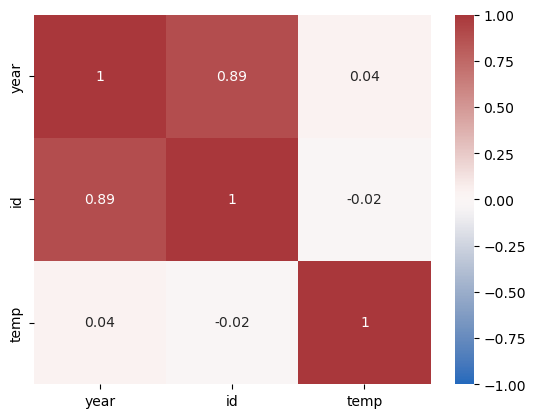

In [459]:
combine_overall.corr().round(2)
sns.heatmap(combine_overall.corr().round(2),annot=True,vmin=-1,vmax=1,cmap='vlag')


<Axes: >

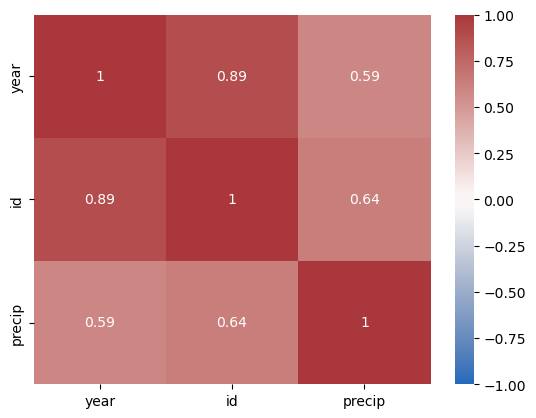

In [463]:
combine_overallp.corr().round()
sns.heatmap(combine_overallp.corr().round(2),annot=True,vmin=-1,vmax=1,cmap='vlag')


<Axes: >

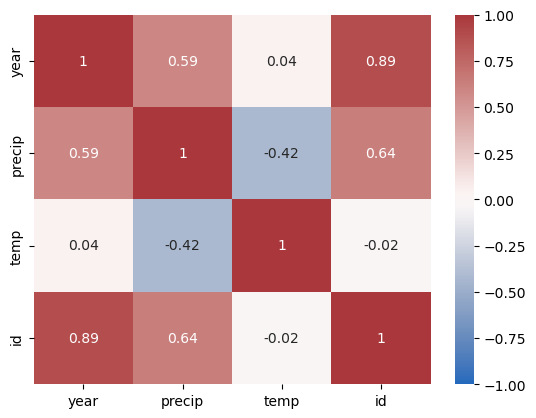

In [535]:
combine_both = combine_overallp.merge(combine_overall[['year','id','temp']],on=['year','id'])
update_both = combine_both.drop(['id'], axis=1)
#update_both
#add in mushroom observation counts per year
combine_third= update_both.merge(m_counts[['year','id']], on=['year']) 
#combine_third
combine_third.corr().round()
sns.heatmap(combine_third.corr().round(2),annot=True,vmin=-1,vmax=1,cmap='vlag')

In [536]:
matrix = combine_third.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype = bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

<Axes: >

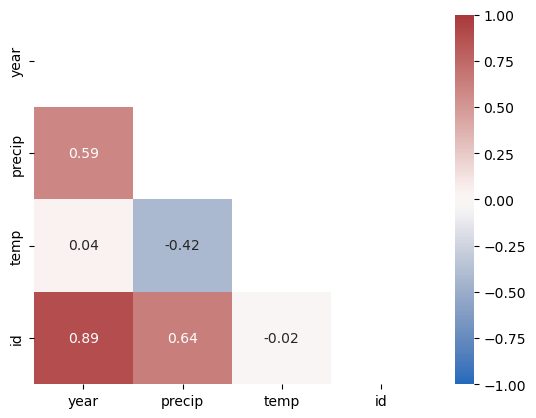

In [537]:
sns.heatmap(matrix, annot=True,vmax=1,vmin=-1,cmap='vlag',mask=mask)

In [538]:
matrix = matrix.unstack()
matrix[matrix>0]

year    year      1.00
        precip    0.59
        temp      0.04
        id        0.89
precip  year      0.59
        precip    1.00
        id        0.64
temp    year      0.04
        temp      1.00
id      year      0.89
        precip    0.64
        id        1.00
dtype: float64

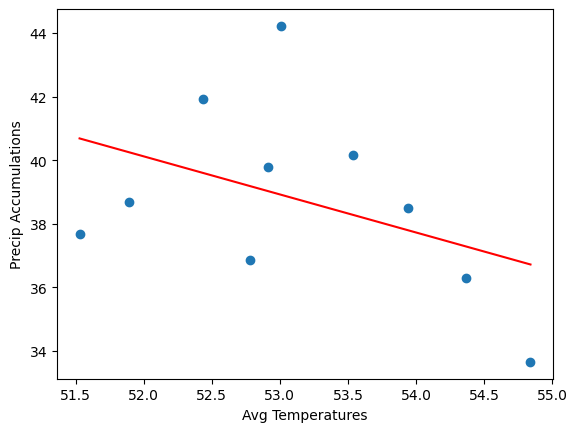

In [496]:
temps = update_both['temp']
precip = update_both['precip']

coeffcients=np.polyfit(temps,precip,1)
line = np.poly1d(coeffcients)
x_values =np.linspace(min(temps), max(temps),100)

plt.plot(x_values,line(x_values),color='red',label='Trend Line')

plt.scatter(temps,precip)
plt.xlabel('Avg Temperatures')
plt.ylabel('Precip Accumulations')
plt.show()

In [533]:
#use m_counts with the weather to get a full picture
m_counts

,year,id
0,2010,10756
1,2011,14228
2,2012,17057
3,2013,17416
4,2014,20127
5,2015,17097
6,2016,20373
7,2017,22598
8,2018,31350
9,2019,24991


In [526]:
spring = df_2010s[df_2010s['month'].isin([3,4,5])]
get_state = spring[spring['state']=='TN']
spr_tnmush = get_state['family'].value_counts()
spr_tnmush.head(15)

Unknown            77
Polyporaceae       77
Psathyrellaceae    71
Pluteaceae         29
Mycenaceae         28
Xylariaceae        27
Omphalotaceae      26
Russulaceae        19
Morchellaceae      17
Sarcosomataceae    14
Gloeophyllaceae    13
Auriculariaceae    13
Amanitaceae        13
Sarcoscyphaceae    13
Bolbitiaceae       12
Name: family, dtype: int64

In [527]:
summer = df_2010s[df_2010s['month'].isin([6,7,8])]
get_state = summer[summer['state']=='TN']
sum_tnmush = get_state['family'].value_counts()
sum_tnmush.head(15)

Amanitaceae        159
Russulaceae        128
Boletaceae         115
Unknown            104
Entolomataceae      63
Omphalotaceae       61
Cladoniaceae        55
Agaricaceae         48
Hydnaceae           47
Hygrophoraceae      45
Pluteaceae          44
Marasmiaceae        43
Psathyrellaceae     38
Polyporaceae        35
Porotheleaceae      30
Name: family, dtype: int64

In [528]:
fall = df_2010s[df_2010s['month'].isin([9,10,11])]
get_state = fall[fall['state']=='TN']
fall_tnmush = get_state['family'].value_counts()
fall_tnmush.head(15)

Unknown            96
Amanitaceae        71
Mycenaceae         40
Polyporaceae       40
Psathyrellaceae    39
Boletaceae         32
Russulaceae        32
Physalacriaceae    32
Entolomataceae     31
Agaricaceae        29
Hygrophoraceae     28
Lycoperdaceae      25
Cortinariaceae     25
Strophariaceae     19
Pluteaceae         16
Name: family, dtype: int64

In [529]:
winter = df_2010s[df_2010s['month'].isin([12,1,2])]
get_state = winter[winter['state']=='TN']
win_tnmush = get_state['family'].value_counts()
win_tnmush.head(15)

Unknown             103
Polyporaceae         74
Mycenaceae           40
Hygrophoraceae       34
Physalacriaceae      26
Hymenogastraceae     21
Strophariaceae       18
Pleurotaceae         17
Hymenochaetaceae     17
Tricholomataceae     15
Irpicaceae           15
Cladoniaceae         13
Entolomataceae       13
Auriculariaceae      13
Clitocybaceae        11
Name: family, dtype: int64